In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.array([-1, 1, 2])
diff = np.diff(a)
v = np.concatenate([a[0:1], a]) + 1/2 * np.concatenate([-diff[0:1], diff, diff[-1:]])

In [3]:
def step_function(x, a):
    return np.sum((x[:, None] >= a[None, :]), axis=1)

([<matplotlib.axis.YTick at 0x2ddcb44a410>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3')])

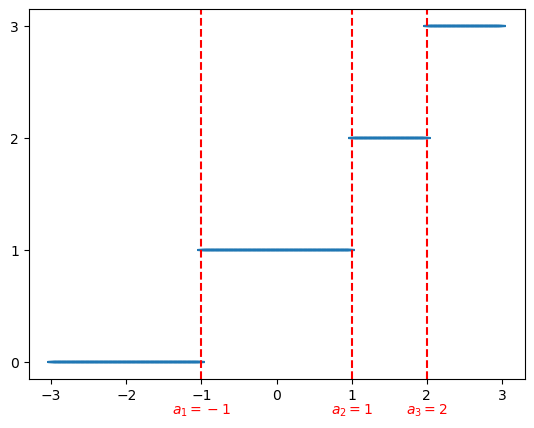

In [4]:
## Encoding function
x = np.linspace(-3, 3, 1000)
y = step_function(x, a)
plt.scatter(x, y, marker="_")
for f,thr in enumerate(a):
    plt.axvline(thr, color='red', linestyle='--')
    plt.text(thr, -0.5, f'${{a_{{{f+1}}}}} = {thr}$', color='red', ha='center', va='bottom')
plt.yticks([0, 1, 2,3])    

In [5]:
def decode_function(ind, a):
    diff = np.diff(a)
    v = np.concatenate([a[0:1], a]) + 1/2 * np.concatenate([-diff[0:1], diff, diff[-1:]])
    return v[ind]


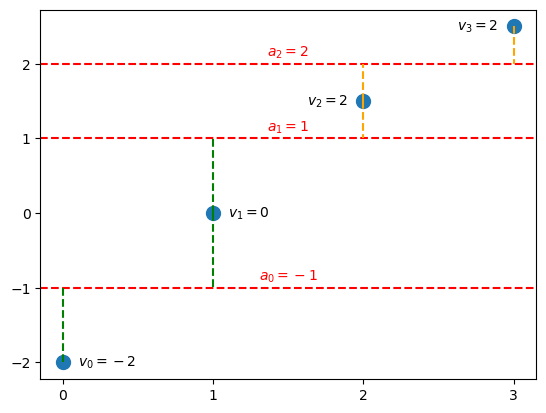

In [6]:
x = np.arange(0, 4)
y = decode_function(x, a)
plt.scatter(x, y, marker='o', s = 100)

for i, yi in enumerate(y):
    offset = 0.1 if i < 2 else -0.1
    ha = 'left' if i < 2 else 'right'
    plt.text(x[i] + offset, yi, f'$v_{{{i}}} = {yi:.0f}$', color='black', ha=ha, va='center')

plt.xticks(x)

for f,thr in enumerate(a):
    plt.axhline(thr, color='red', linestyle='--')
    plt.text(1.5, thr + 0.15, f'${{a_{{{f}}}}} = {thr}$', color='red', ha='center', va='center')

for i in range(len(a)+1):
    color = 'green' if i < 2 else 'orange'
    if i == 0:
        plt.plot([x[i], x[i]], [y[i], a[i]], color=color, linestyle='--')
    elif i == len(a):
        plt.plot([x[i], x[i]], [y[i], a[i-1]], color=color, linestyle='--')
    else:
        plt.plot([x[i], x[i]], [y[i], a[i-1]], color=color, linestyle='--')
        plt.plot([x[i], x[i]], [y[i], a[i]], color=color, linestyle='--')
        # plt.plot([x[i]-0.05, x[i]+0.05], [y[i], y[i]], color=color, linestyle='--')

    # for i, yi in enumerate(y):
    #     # Find the closest horizontal line (threshold) to each dot
    #     distances = np.abs(a - yi)
    #     closest_idx = np.argmin(distances)
    #     plt.plot([x[i], x[i]], [yi, a[closest_idx]], 'k--')
    #     plt.text(x[i]+0.05, (yi + a[closest_idx])/2, f'{distances[closest_idx]:.1f}', color='black', va='center')

In [7]:
#Quantization function
def quantize_function(x,a):
    ind = step_function(x, a)
    y = decode_function(ind, a)
    return y

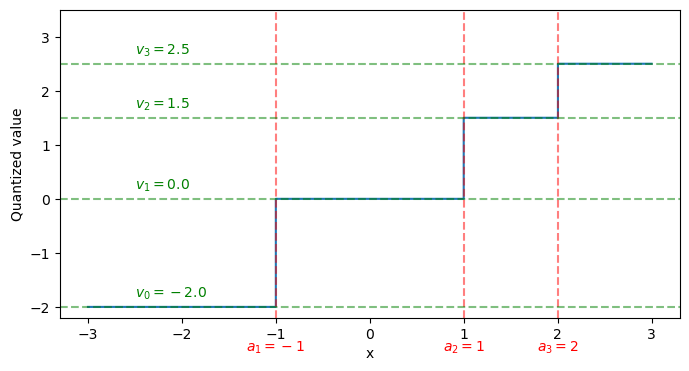

In [15]:
x_plot = np.linspace(-3, 3, 1000)
y_quant = quantize_function(x_plot, a)
min_val = np.min(y_quant)
max_val = np.max(y_quant)
plt.figure(figsize=(8, 4))
plt.plot(x_plot, y_quant, drawstyle='steps-post')
plt.xlabel('x')
plt.ylabel('Quantized value')
plt.ylim(min_val-0.2, max_val+1)
# plt.title('Quantization Function')
# plt.grid(True)
for f, thr in enumerate(a):
    plt.axvline(thr, color='red', linestyle='--', alpha=0.5)
    plt.text(thr, min_val-0.9, f'${{a_{f+1}}} = {thr}$', color='red', ha='center', va='bottom')

for f, val in enumerate(v):
    plt.axhline(val, color='green', linestyle='--', alpha=0.5)
    plt.text(-2.5, val + 0.25, f'${{v_{f}}} = {val}$', color='green', ha='left', va='center')

plt.show()

## Minmax und quantile quantization

In [29]:
# Create a right-skewed dataset using exponential distribution
skewed_data = np.random.exponential(scale=1.0, size=1000)
skewed_data = skewed_data[skewed_data <= 4]

In [35]:
x_max

3.9968351578516734

In [40]:
x_min = np.min(skewed_data)
x_max = np.max(skewed_data)
M = 3
s = (x_max - x_min) / (M)
v = np.arange(x_min, x_max+10e-10, s)
a = (v[:-1] + v[1:]) / 2

In [43]:
v

array([3.06198858e-04, 1.33248252e+00, 2.66465884e+00, 3.99683516e+00])

In [41]:
quantiles = np.arange(1, M+1) / (M+1)
thresholds = np.quantile(skewed_data, quantiles)

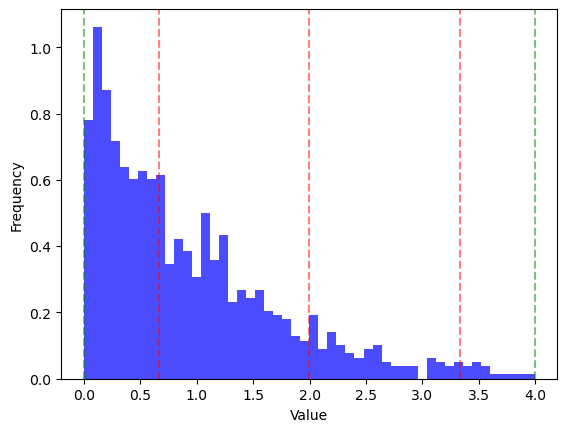

In [53]:
plt.hist(skewed_data, bins=50, color='blue', alpha=0.7, density=True)
# plt.title('Right-Skewed Dataset (Exponential Distribution)')

for t, thr in enumerate(a):
    plt.axvline(thr, color='red', linestyle='--', alpha=0.5)
    # plt.text(thr, 50, f'${{a_{t+1}}} = {thr:.2f}$', color='red', ha='center', va='bottom')

plt.axvline(x_min, color='green', linestyle='--', alpha=0.5)
# plt.text(x_min, 50, f'${{a_0}} = {x_min:.2f}$', color='green', ha='left', va='bottom')

plt.axvline(x_max, color='green', linestyle='--', alpha=0.5)
# plt.text(x_max, 50, f'${{a_{M}}} = {x_max:.2f}$', color='green', ha='right', va='bottom')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Quantized value')

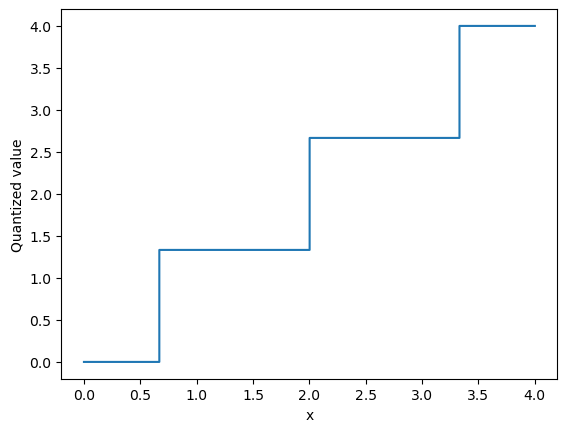

In [46]:
x_plot = np.linspace(0,4,1000)
x_quant = quantize_function(x_plot, a)

plt.plot(x_plot, x_quant, drawstyle='steps-post')
plt.xlabel('x')
plt.ylabel('Quantized value')

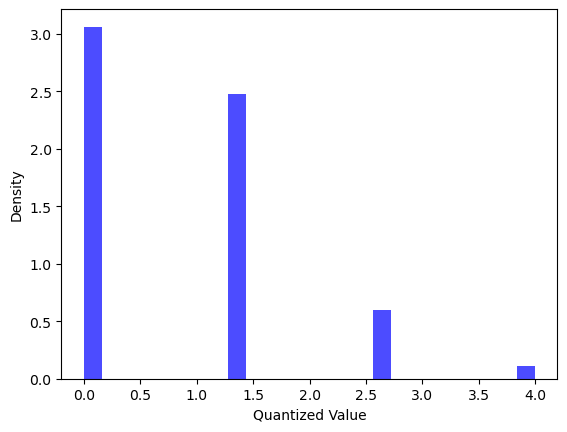

In [59]:
s_quant_skewed = quantize_function(skewed_data, a)
plt.hist(s_quant_skewed, bins=25, color='blue', alpha=0.7, density=True)
plt.xlabel('Quantized Value')
plt.ylabel('Density')
plt.show()

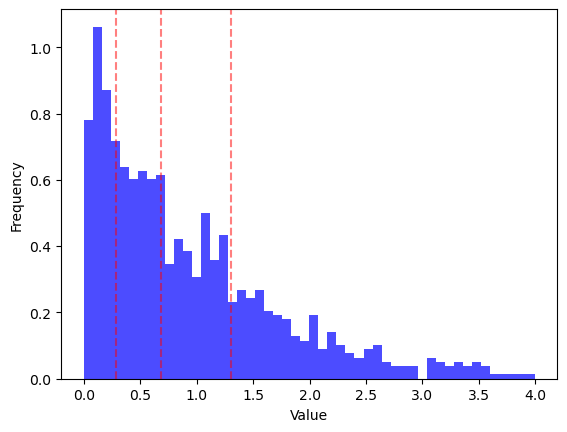

In [ ]:
plt.hist(skewed_data, bins=50, color='blue', alpha=0.7, density=True)
# plt.title('Right-Skewed Dataset (Exponential Distribution)')

for t, thr in enumerate(thresholds):
    plt.axvline(thr, color='red', linestyle='--', alpha=0.5)
    # plt.text(thr, 50, f'${{a_{t+1}}} = {thr:.2f}$', color='red', ha='center', va='bottom')

# plt.axvline(x_min, color='green', linestyle='--', alpha=0.5)
# plt.text(x_min, 50, f'${{a_0}} = {x_min:.2f}$', color='green', ha='left', va='bottom')

# plt.axvline(x_max, color='green', linestyle='--', alpha=0.5)
# plt.text(x_max, 50, f'${{a_{M}}} = {x_max:.2f}$', color='green', ha='right', va='bottom')

plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

Text(0, 0.5, 'Quantized value')

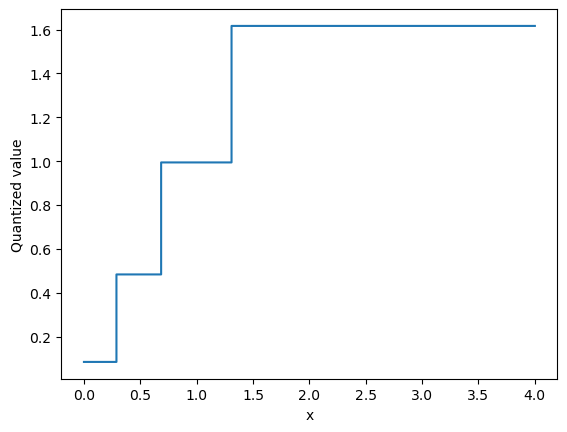

In [48]:
x_plot = np.linspace(0,4,1000)
x_quant = quantize_function(x_plot, thresholds)

plt.plot(x_plot, x_quant, drawstyle='steps-post')
plt.xlabel('x')
plt.ylabel('Quantized value')

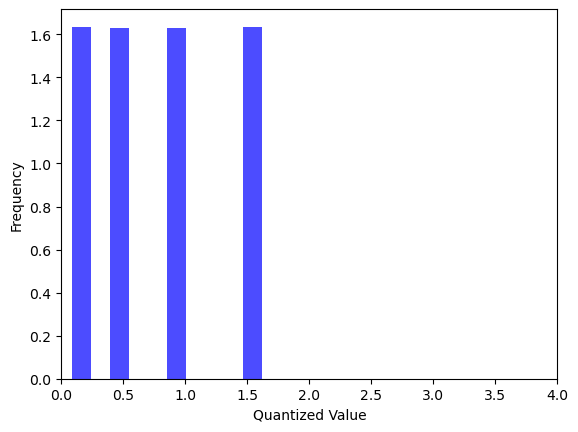

In [62]:
s_quant_thresholds = quantize_function(skewed_data, thresholds)
plt.hist(s_quant_thresholds, bins=10, color='blue', alpha=0.7, density=True)
plt.xlim(0, 4)
plt.xlabel('Quantized Value')
plt.ylabel('Frequency')
plt.show()